In [1]:
###standard imports 
import pandas as pd
import numpy as np
from pandas import DataFrame as df, Series

from numpy.random import randn

##plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
titanic = pd.read_excel('titanic3.xls')

In [5]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic.info() ## Necessary to check the type of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
## QUESTION 1::: who were the pessangers on Titanic###
##first grouping them by sex

In [147]:
gender.describe()

pclass                                              survived            \
        count      mean       std  min  25%  50%  75%  max    count      mean   
sex                                                                             
female  466.0  2.154506  0.866181  1.0  1.0  2.0  3.0  3.0    466.0  0.727468   
male    843.0  2.372479  0.811908  1.0  2.0  3.0  3.0  3.0    843.0  0.190985   

        ...       fare             body                                     \
        ...        75%       max  count       mean         std  min    25%   
sex     ...                                                                  
female  ...  55.331275  512.3292    8.0  166.62500  138.110657  7.0  52.75   
male    ...  26.550000  512.3292  113.0  160.39823   95.035289  1.0  79.00   

                             
          50%    75%    max  
sex                          
female  133.5  306.0  328.0  
male    155.0  255.0  322.0  

[2 rows x 56 columns]

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

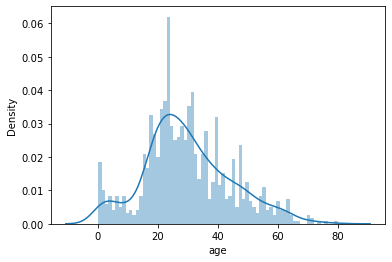

In [9]:
##there more males than female on the titanic ship 
#percentages 
sns.distplot(titanic['age'], bins=70)

In [149]:
titanic['age'].mean()

29.8811345124283

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

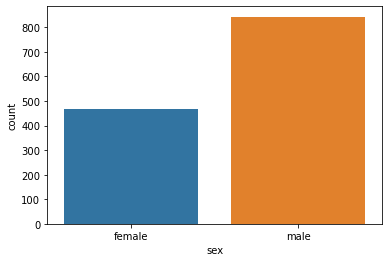

In [151]:
    #### Using count plot ####
sns.countplot('sex',data=titanic)


/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

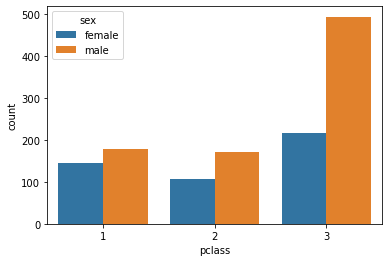

In [153]:
sns.countplot('pclass',data=titanic, hue='sex')

In [11]:
    ####creating a function to group the passengers by age##
def agegrouping(passenger):
        age,sex = passenger
        if age <=10:
            return 'child'
        elif age>10 and age<20:
            return 'tenager'
        elif age >20 and age<40:
            return 'adult'
        else:
            return 'aged'

titanic['agegroup'] = titanic[['age','sex']].apply(agegrouping, axis = 1)

        


In [13]:
titanic.head(5) ## checking the data to see the age groups

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,agegroup
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult


In [15]:
titanic['agegroup'].value_counts()

adult      553
aged       531
tenager    139
child       86
Name: agegroup, dtype: int64

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

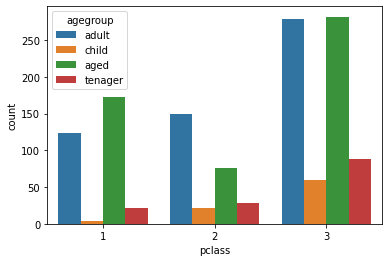

In [14]:
sns.countplot('pclass', data=titanic, hue="agegroup")

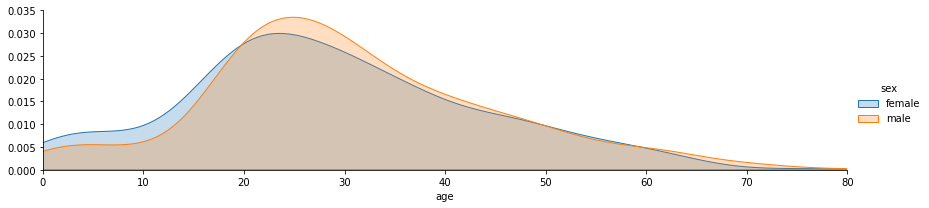

In [158]:
    ##Drawing multiple plots together and see the distribution
#set an object for the first plot and then map the other plot
fig = sns.FacetGrid(titanic, hue='sex', aspect =4) 
fig.map(sns.kdeplot, 'age', shade=True)

oldest = titanic['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

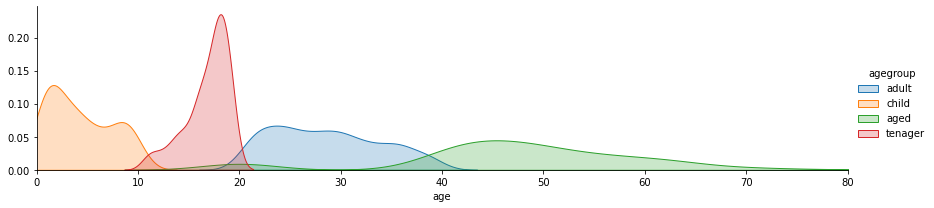

In [159]:
    ##Drawing multiple plots together##
##set an object first and then map the other plots
fig = sns.FacetGrid(titanic, hue='agegroup', aspect =4) ##FacetGrid allows multiple plots. the will use the age column
fig.map(sns.kdeplot, 'age', shade=True)

oldest = titanic['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

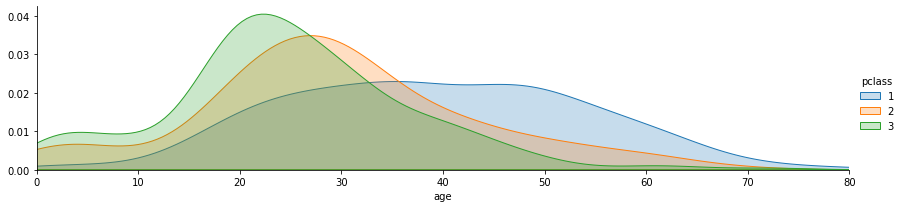

In [342]:
    ##Drawing multiple kernel density hue by pclass together an##
##set an object 
fig = sns.FacetGrid(titanic, hue='pclass', aspect =4) ##FacetGrid allows multiple plots. the will use the age column
fig.map(sns.kdeplot, 'age', shade=True)

oldest = titanic['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

In [103]:
##We can see that the 1st class had a normal distribution but the 2nd and third class are  right skewed toward towards the mean 

In [19]:
    ##lets creat the deck from the cabin column
deck = titanic['cabin'].dropna() ### we created an object deck
deck

0            B5
1       C22 C26
2       C22 C26
3       C22 C26
4       C22 C26
         ...   
1189         G6
1217      F G73
1230         G6
1231         G6
1249        F38
Name: cabin, Length: 295, dtype: object

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabin', ylabel='count'>

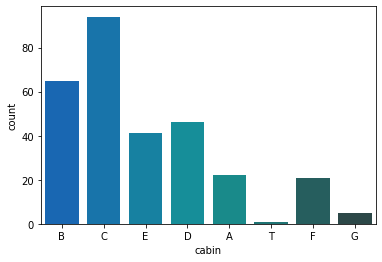

In [20]:
levels =[] ####here we just created an empty list called levels

for level in deck: 
    levels.append(level[0]) 
    
cabin_df = df(levels)
#levels
cabin_df.columns = ['cabin']

sns.countplot('cabin', data=cabin_df, palette='winter_d')

In [21]:
##droping the T cabin 
cabin_df = cabin_df[cabin_df.cabin!='T']

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cabin', ylabel='count'>

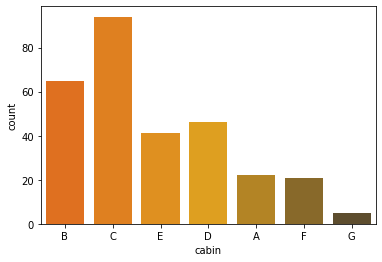

In [22]:
sns.countplot('cabin', data=cabin_df, palette='autumn_d')

<AxesSubplot:xlabel='embarked', ylabel='count'>

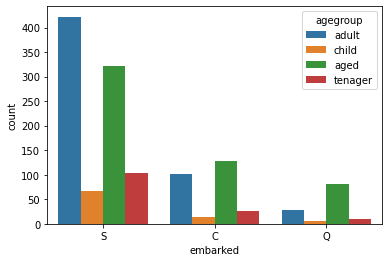

In [361]:
##Question 3: where did the passengers come from by age-group?
sns.countplot('embarked', data=titanic, hue='agegroup')

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

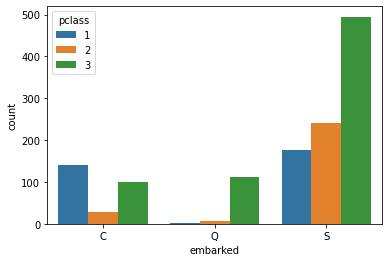

In [364]:
##Question 3: where did the passengers come from by age-group?
sns.countplot('embarked', data=titanic, hue='pclass', order=['C','Q','S'])  ####the order attribute arranges the bbarplot in order specified

In [386]:
##Who is alone and who is with family?
##lets create a function to extract who is alone or with family 
def with_fam(not_alone):
    parch,sibsp=not_alone
    if parch > 0 or sibsp > 0 :
        return 'has family'
    else:
        return 'alone'
titanic['travelled_with'] = titanic[['parch', 'sibsp']].apply(with_fam, axis=1)    

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

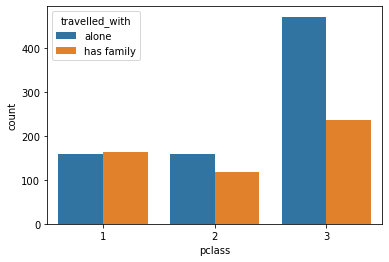

In [388]:
sns.countplot('pclass', data=titanic, hue='travelled_with' )

In [389]:
titanic['travelled_with'].value_counts()

alone         790
has family    519
Name: travelled_with, dtype: int64

In [374]:
##Another way is to add both colums together ##
titanic['alone'] = titanic['sibsp']+titanic['parch']

In [376]:
titanic['alone'].loc[titanic['alone']>0] = 'with family'
titanic['alone'].loc[titanic['alone']==0] = 'Alone'

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

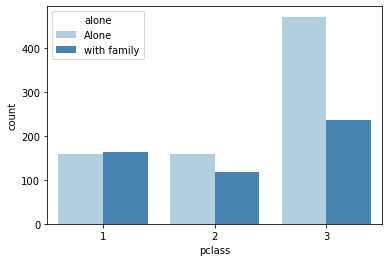

In [385]:
sns.countplot('pclass', data=titanic, hue='alone', palette='Blues')

In [381]:
titanic['alone'].value_counts()

Alone          790
with family    519
Name: alone, dtype: int64

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alone', ylabel='count'>

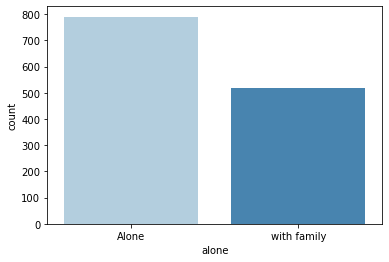

In [390]:
sns.countplot('alone', data=titanic, palette='Blues')

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survivor', ylabel='count'>

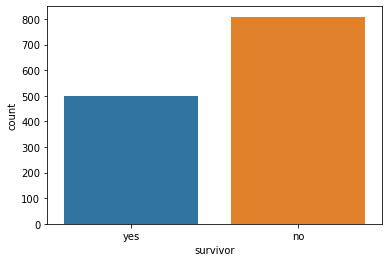

In [23]:
##What factors helped someone survived the sinking or crash of the titanic?

##making a column called survivor###
titanic['survivor'] = titanic.survived.map({0:'no', 1:'yes'}) 
sns.countplot('survivor', data=titanic)





/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

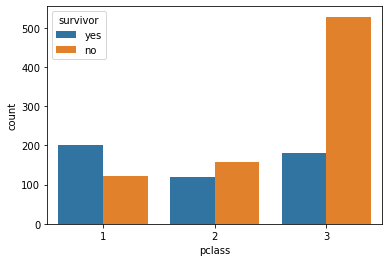

In [24]:
sns.countplot('pclass', data=titanic, hue='survivor')

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


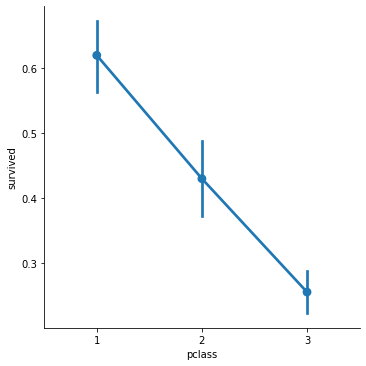

In [25]:
sns.factorplot('pclass', 'survived', data=titanic)

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


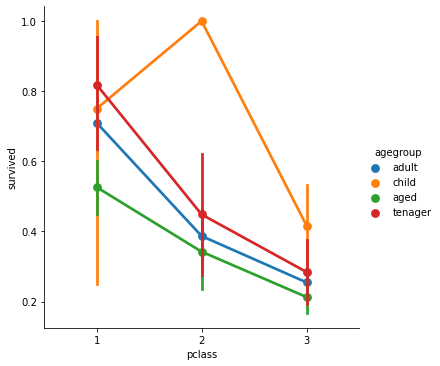

In [27]:
    ##condidering class and gender ##
sns.factorplot('pclass','survived', data=titanic, hue='agegroup')
##the graph shows that being a child increases the chances of survival which is higher in the second class compaered to the 1st class and becuase there are fewer children in class 1 and 3, the highest chances of survival as child occur in the second class
##also the chances of survivor decreases with increase in age 

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


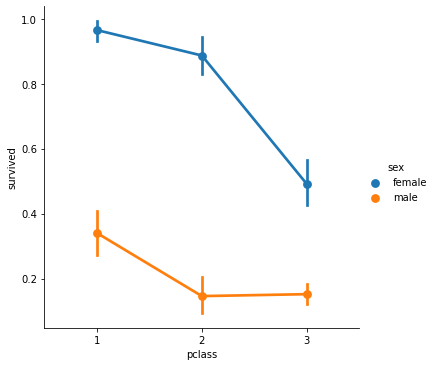

In [403]:
sns.factorplot('pclass','survived', data=titanic, hue='sex')
##checking whether sex has an effect on survivor indicates that being a male in any of the class really reduces the chances of survival.

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


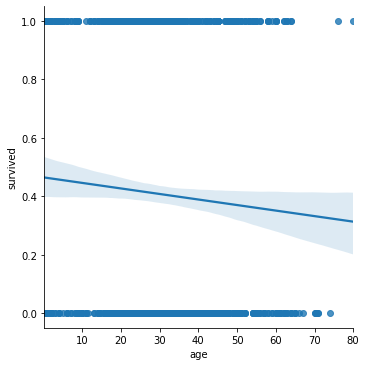

In [28]:
##Using a linear plot on age and survival##
sns.lmplot('age', 'survived', data= titanic)

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


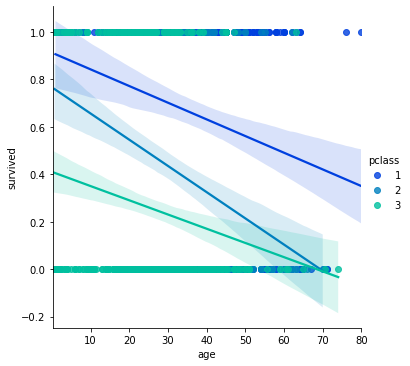

In [29]:
sns.lmplot('age', 'survived',hue='pclass', data= titanic, palette='winter')
##the curve indicates that there is more deaths in the third class and  and the chances of survival decrease as we go from 1st to the 3rd class###

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


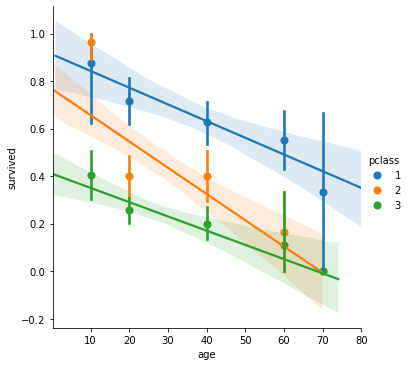

In [410]:
##cleaning up the figure a little bit more to not have all the ageas in a single plot##

###let's create age bins###

generations = [10, 20, 40,60,70]

sns.lmplot('age', 'survived', hue='pclass', data= titanic, x_bins=generations)

##The data showed that the chances of survival for a child with the range of 10 year is higher in second class than in first class and the teil end the chances of survival is the same for the age group of 70 for both second and third class##
##the standard deviation is shown by the distance of the points from the individual lines the yello round dot from thr yelow line is the standard deviation for each group 

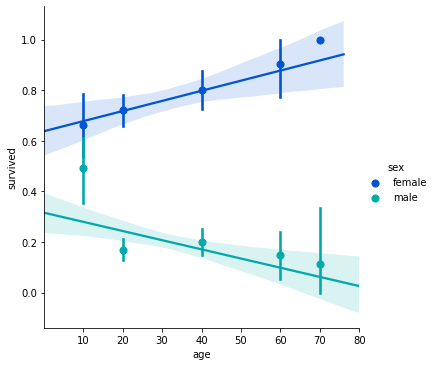

In [415]:
##checking the survival by sex ##
sns.lmplot('age', 'survived', data=titanic, hue='sex', palette='winter', x_bins=generations)

##if you are an older female, it is more likely for you to survive than for an older male.
##note the the standard deviation is the distance of the. points from the line

In [30]:
    #Lastly we'll answer this two questions....
## Did the deck have an effect on the passenger survival rate ? what's our thought? 
## Did having a family member increase the odds of surving the crash ?


In [31]:
 #effect of deck on survival......
## creating a new dataframe with a new column of deck class
titanic2 = titanic.dropna(subset= ['cabin']) ##subset is used to drop na of a particular column#


In [36]:
titanic2
deck_in = titanic2['cabin']


deck = []

for i in deck_in:
    i = i[0]
    deck.append(i)
    
    
df(deck)##make deck a dataframe
deck[:15]


['B', 'C', 'C', 'C', 'C', 'E', 'D', 'A', 'C', 'C', 'C', 'B', 'A', 'B', 'B']

In [39]:
##adding decks as a column to titanic 2 data
                    ##titanic_2 = pd.concat([titanic2, deck2],axis=1)#### doesn't work returned more rows

                        ##renaming the column.
                        #titanic_2['cabin'].describe()####

                #titanic_2
titanic2['deck']= deck
titanic2.head(10)


<ipython-input-39-d96ac956b884>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic2['deck']= deck


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,agegroup,survivor,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,yes,B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child,yes,C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",child,no,C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,no,C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,no,C
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",aged,yes,E
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",aged,yes,D
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult,no,A
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",aged,yes,C
10,1,0,"Astor, Col. John Jacob",male,47.0000,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",aged,no,C


In [554]:
titanic2['deck'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: deck, dtype: int64

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


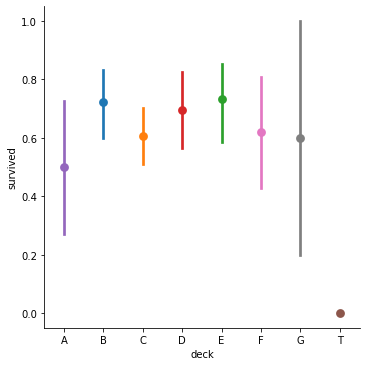

In [553]:
sns.factorplot('deck','survived', data= titanic2, hue='deck', order=['A','B','C','D','E','F','G','T'])

## the graph doesnt really show a particular partern as to whether the deck really affects the chances of survival.
##quite surpriseing because one would have thought that the lower decks would have had the greater chance of getting out of the ship faster to safety than those on the upper deck, but then on a second thought it is intuitive to see that most people would have 
##definitely clustered together at the deck that is less flooded and safe at the time which removed the importance of deck as everyon would have lkeaped out to safety.

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


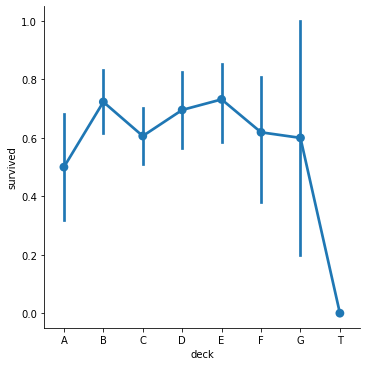

In [558]:
sns.factorplot('deck','survived', data= titanic2, order=['A','B','C','D','E','F','G','T'])

In [ ]:
    #finally......
##Did having a family member increase the odds of surving the crash?

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


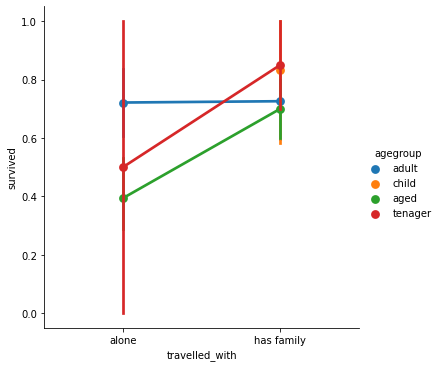

In [560]:
sns.factorplot('travelled_with', 'survived',data= titanic2, hue='agegroup')
##This is quite interesting as it showed that the chances of survival doubles when a passenger 
##has a family than someone who is alone except for adults whihc indicates no changes at all whether or not one is alone.